# Hierarchical Query

#### INTRODUCTION
- A hierarchical query is a type of SQL query that handles hierarchical model data<br>
- Parent-child relationship exists within the records of the table<br>
- Recursive CTE'S are well suited for querying hierarchical data<br>

#### SYNTAX OF RECURSIVE CTE

<code>
    WITH cte_name (column1, column2, …)
    AS
    (
       cte_query_definition -- Anchor member
       UNION ALL
       cte_query_definition -- Recursive member; references cte_name.
    )    
    -- Statement using the CTE
    SELECT *
    FROM   cte_name;
</code>

#### STRUCTURE OF RECURSIVE CTE 

<ul>
<li> ANCHOR MEMBER<br>
    This is the base case query that gets executed first and only once. Let say returns resultset R0.</li>
<li> RECURSIVE MEMBER<br>
    The recursive query uses the result from the base case and is executed repeatedly.Each execution returns subset of data.Lets say resultset is R1.The execution of the query continues until it satifies the terminating condition.</li>
<li> UNION<br>
    The query execution stops on termination check and result set R0 and R1 are combined through 'UNION'.</li>
</ul>



#### EXAMPLE
```
CREATE TABLE royal_family
    (`ID` int, `NAME` varchar(9), `PARENT_ID` int);
    
INSERT INTO royal_family
    (`ID`, `NAME`, `PARENT_ID`)
VALUES
    (1, 'Elizabeth', 0),
    (2, 'Charles', 1),
    (3, 'William', 2),
    (4, 'Harry', 2),
    (5, 'George', 3),
    (6, 'Charlotte', 3),
    (7, 'Louis', 3),
    (8, 'Archie', 4);
```


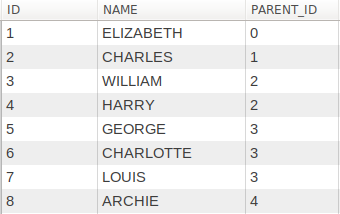

**1. Fetch all the children and grandchildren of Elizabeth
(or)
    Fetch all descendents of Elizabeth

Soln:
```
WITH RECURSIVE top_down_cte AS
(
    SELECT M.ID,M.NAME,M.PARENT_ID FROM royal_family AS M WHERE M.NAME='ELIZABETH'
    UNION
    SELECT m.ID,m.NAME,m.PARENT_ID FROM top_down_cte
    INNER JOIN royal_family AS m 
    ON top_down_cte.ID = m.PARENT_ID
)SELECT * FROM top_down_cte;
```

**2. Fetch all ancestors of 'Archie'

Soln:
```
WITH RECURSIVE bottom_up_cte AS
(
  SELECT M.ID,M.NAME,M.PARENT_ID FROM royal_family AS M WHERE M.NAME='ARCHIE'
  UNION
  SELECT m.ID,m.NAME,m.PARENT_ID FROM bottom_up_cte 
  INNER JOIN royal_family AS m 
  ON bottom_up_cte.PARENT_ID = m.ID
)SELECT * FROM bottom_up_cte;
```

**3. Fetch all Grandparents and Grandchildren

Soln:
```
WITH RECURSIVE gc AS
(
  SELECT M.ID,M.NAME FROM royal_family AS M
  UNION
  SELECT m2.ID,m2.NAME FROM gc 
  INNER JOIN royal_family AS m1
  ON m1.PARENT_ID = gc.ID
  INNER JOIN royal_family AS m2
  ON m2.PARENT_ID = m1.ID
)SELECT * FROM gc;
```